# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.options.display.width = 1000

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others_plus_MGC_remove.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent
0,4.00,299.00,3.32,0.110000,1,1,132.0,0,0,0,0
1,4.00,299.00,3.32,0.290000,1,1,132.0,0,0,1,0
2,4.00,299.00,3.32,0.230000,1,1,132.0,0,0,1,0
3,4.00,299.00,3.32,0.730000,1,1,132.0,0,0,1,0
4,4.00,299.00,3.32,1.860000,1,1,132.0,0,0,1,0
5,4.00,299.00,3.32,0.210000,1,1,132.0,0,0,1,0
6,4.00,299.00,3.32,0.340000,1,1,132.0,0,0,1,0
7,4.00,299.00,3.32,0.240000,1,1,132.0,0,0,1,0
8,4.00,299.00,3.32,1.970000,1,1,132.0,0,0,1,0
9,4.00,299.00,3.32,0.690000,1,1,132.0,0,0,1,0


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent']

In [5]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
#DPPP_DTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [7]:
y = DPP_DTT_Y
X = DPP_DTT_X

In [8]:
# Make sure you've installed the bayesian-optimization package:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Assume X, y are already defined (e.g., loaded from your dataset)
# X, y = your_data

def lr_cv(fit_intercept):
    # Convert the continuous value into a boolean:
    # if fit_intercept >= 0.5, use True; otherwise False.
    use_intercept = bool(round(fit_intercept))
    model = LinearRegression(fit_intercept=use_intercept)
    
    # Evaluate using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the parameter bounds; since fit_intercept is a boolean,
# we search over the continuous interval [0, 1].
pbounds = {'fit_intercept': (0, 1)}

# Set up Bayesian Optimization
optimizer = BayesianOptimization(
    f=lr_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization:
# init_points: number of initial random explorations
# n_iter: number of Bayesian optimization iterations
optimizer.maximize(init_points=5, n_iter=25)

# Print the best parameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)

|   iter    |  target   | fit_in... |
-------------------------------------
| 1         | -37.54    | 0.3745    |
| 2         | -41.47    | 0.9507    |
| 3         | -41.47    | 0.732     |
| 4         | -41.47    | 0.5987    |
| 5         | -37.54    | 0.156     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -37.54    | 1.163e-05 |
| 7         | -37.54    | 0.1559    |
| 8         | -37.54    | 0.2752    |
| 9         | -37.54    | 0.07198   |
| 10        | -37.54    | 0.3302    |
| 11        | -37.54    | 0.2138    |
| 12        | -37.54    | 0.03233   |
| 13        | -37.54    | 0.1156    |
| 14        | -37.54    | 0.3555    |
| 15        | -37.54    | 0.2439    |
| 16        | -37.54    | 0.184     |
| 17        | -37.54    | 0.3026    |
| 18        | -37.54    | 0.0936    |
| 19        | -37.54    | 0.01407   |
| 20        | -37.54    | 0.136     |
| 21        | -37.54    | 0.05229   |
| 22        | -37.54    | 0.2596    |
| 23        | -37.54    | 0.3659    |
| 24        | -37.54    | 0.199     |
| 25        | -37.54    | 0.3165    |
| 26        | -37.54    | 0.2289    |
| 27        | -37.54    | 0.1706    |
| 28        | -37.54    | 0.2889    |
| 29        | -37.54    | 0.3422    |
| 30        | -37.54    | 0.1046    |
Best parameters found:
{'target': -37.537284575733

## Polynomial regression

In [9]:
# Install bayesian-optimization if needed:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Assume X, y are already defined from your dataset
# X, y = your_data

def poly_reg_cv(degree, fit_intercept):
    # Convert the degree to an integer
    degree = int(round(degree))
    # Convert the continuous fit_intercept into a boolean
    use_intercept = bool(round(fit_intercept))
    
    # Create a pipeline that first generates polynomial features then fits a LinearRegression model
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression(fit_intercept=use_intercept))
    ])
    
    # Evaluate using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define bounds for hyperparameters:
# degree: searching between 1 and 5 (you can adjust based on your problem)
# fit_intercept: from 0 to 1, then converted to a boolean using a threshold of 0.5.
pbounds = {
    'degree': (1, 5),
    'fit_intercept': (0, 1)
}

# Set up Bayesian Optimization
optimizer = BayesianOptimization(
    f=poly_reg_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# init_points: number of initial random explorations
# n_iter: number of Bayesian optimization iterations
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best parameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   |  degree   | fit_in... |
-------------------------------------------------
| 1         | -18.7     | 2.498     | 0.9507    |
| 2         | -3.132e+1 | 3.928     | 0.5987    |
| 3         | -2.225e+1 | 1.624     | 0.156     |
| 4         | -41.47    | 1.232     | 0.8662    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 5         | -3.81e+17 | 3.404     | 0.7081    |
| 6         | -41.47    | 1.282     | 0.9094    |
| 7         | -18.7     | 2.019     | 0.9971    |
| 8         | -2.02e+13 | 4.987     | 0.01936   |
| 9         | -8.896e+1 | 4.998     | 0.9905    |
| 10        | -7.741e+0 | 3.584     | 0.001331  |
| 11        | -95.7     | 2.578     | 0.0007939 |
| 12        | -7.741e+0 | 4.275     | 0.00123   |
| 13        | -41.04    | 1.001     | 0.02066   |
| 14        | -2.225e+1 | 2.245     | 0.4646    |
| 15        | -95.7     | 2.992     | 0.2874    |
| 16        | -41.47    | 1.005     | 0.9655    |
| 17        | -3.81e+17 | 2.98      | 0.9994    |
| 18        | -41.04    | 1.004     | 0.4441    |
| 19        | -95.7     | 3.064     | 0.001235  |
| 20        | -2.225e+1 | 2.08      | 0.0008751 |
| 21        | -7.741e+0 | 3.789     | 0.2899    |
| 22        | -2.02e+13 | 4.581     | 0.0005467 |
| 23        | -18.7     | 1.676     | 0.6657    |
| 24        | -3.81e+17 | 2.7       | 0.6159    |


## Ridge regression

In [10]:
# Ensure you have installed the bayesian-optimization package:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Assume X, y are already defined in your workspace
# For example: X, y = your_dataset_features, your_dataset_target

def ridge_cv(alpha, fit_intercept):
    # Convert the continuous fit_intercept value to a boolean (True if >=0.5, otherwise False)
    use_intercept = bool(round(fit_intercept))
    
    # Create a Ridge regression model with the given hyperparameters
    model = Ridge(alpha=alpha, fit_intercept=use_intercept)
    
    # Use 5-fold cross-validation and compute the average R² score
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the bounds for the hyperparameters:
# alpha: a positive value; here we search between 0.001 and 100 (adjust as needed)
# fit_intercept: a continuous value between 0 and 1, which we'll convert to boolean
pbounds = {
    'alpha': (0.001, 100),
    'fit_intercept': (0, 1)
}

# Initialize the Bayesian Optimizer with the objective function and bounds
optimizer = BayesianOptimization(
    f=ridge_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization:
# - init_points: number of initial random evaluations
# - n_iter: number of iterations for Bayesian optimization
optimizer.maximize(init_points=5, n_iter=25)

# Print the best parameters and corresponding score found during optimization
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   |   alpha   | fit_in... |
-------------------------------------------------
| 1         | -27.27    | 37.45     | 0.9507    |
| 2         | -27.06    | 73.2      | 0.5987    |
| 3         | -30.97    | 15.6      | 0.156     |
| 4         | -34.8     | 5.809     | 0.8662    |
| 5         | -26.89    | 60.11     | 0.7081    |
| 6         | -27.78    | 99.97     | 0.9966    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 7         | -36.95    | 61.52     | 0.2273    |
| 8         | -32.16    | 10.14     | 0.5217    |
| 9         | -35.34    | 0.5653    | 0.4638    |
| 10        | -26.95    | 66.75     | 0.6422    |
| 11        | -26.89    | 60.1      | 0.6914    |
| 12        | -26.88    | 58.97     | 0.9734    |
| 13        | -37.32    | 68.1      | 0.3592    |
| 14        | -26.94    | 65.84     | 0.7582    |
| 15        | -37.62    | 74.29     | 0.0887    |
| 16        | -37.22    | 66.14     | 0.0268    |
| 17        | -26.95    | 66.34     | 0.9643    |
| 18        | -26.88    | 59.56     | 0.9907    |
| 19        | -36.8     | 59.12     | 0.2473    |
| 20        | -27.05    | 72.71     | 0.9159    |
| 21        | -37.54    | 72.61     | 0.2628    |
| 22        | -27.06    | 73.22     | 0.9722    |
| 23        | -27.26    | 81.92     | 0.6808    |
| 24        | -26.93    | 65.26     | 0.919     |
| 25        | -27.28    | 82.5      | 0.9493    |
| 26        | -37.94    | 82.46     | 0.2951    |


## Lasso regression

In [11]:
# Ensure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace
# Example: X, y = your_dataset_features, your_dataset_target

def lasso_cv(alpha, fit_intercept):
    # Convert the continuous fit_intercept value to a boolean:
    # if fit_intercept is >= 0.5, use True; otherwise, use False.
    use_intercept = bool(round(fit_intercept))
    
    # Create the Lasso regression model with the given hyperparameters.
    model = Lasso(alpha=alpha, fit_intercept=use_intercept, random_state=42)
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
# - alpha: searching within a range (e.g., 0.0001 to 10)
# - fit_intercept: treated as a continuous variable between 0 and 1.
pbounds = {
    'alpha': (0.0001, 10),
    'fit_intercept': (0, 1)
}

# Set up Bayesian Optimization with the objective function and hyperparameter bounds.
optimizer = BayesianOptimization(
    f=lasso_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: number of initial random evaluations.
# - n_iter: number of iterations for Bayesian optimization.
optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   |   alpha   | fit_in... |
-------------------------------------------------
| 1         | -41.09    | 3.745     | 0.9507    |
| 2         | -36.55    | 7.32      | 0.5987    |
| 3         | -39.96    | 1.56      | 0.156     |
| 4         | -45.55    | 0.5809    | 0.8662    |
| 5         | -38.13    | 6.011     | 0.7081    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -40.69    | 6.773     | 0.02443   |
| 7         | -40.37    | 8.284     | 0.3003    |
| 8         | -36.56    | 7.317     | 0.6156    |
| 9         | -37.25    | 6.735     | 0.9991    |
| 10        | -34.12    | 9.958     | 0.9999    |
| 11        | -39.95    | 9.966     | 0.2934    |
| 12        | -34.51    | 9.489     | 0.9877    |
| 13        | -41.07    | 4.975     | 0.0006427 |
| 14        | -40.74    | 2.715     | 0.001601  |
| 15        | -35.0     | 8.918     | 0.9977    |
| 16        | -35.82    | 8.001     | 0.9949    |
| 17        | -39.01    | 5.316     | 0.9948    |
| 18        | -43.18    | 2.261     | 0.9968    |
| 19        | -34.29    | 9.751     | 0.9903    |
| 20        | -35.41    | 8.461     | 0.9907    |
| 21        | -34.17    | 9.892     | 0.9935    |
| 22        | -34.1     | 9.985     | 0.982     |
| 23        | -34.6     | 9.385     | 0.776     |
| 24        | -35.47    | 0.02884   | 0.00994   |
| 25        | -40.21    | 0.5467    | 0.01114   |


## Elasticnet regression

In [12]:
# Make sure you have installed the bayesian-optimization package:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace
# For example: X, y = your_dataset_features, your_dataset_target

def elasticnet_cv(alpha, l1_ratio, fit_intercept):
    # Convert fit_intercept from a continuous value to a Boolean:
    # If fit_intercept >= 0.5, then True; otherwise, False.
    use_intercept = bool(round(fit_intercept))
    
    # Create an ElasticNet regression model with the specified hyperparameters.
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=use_intercept, random_state=42)
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
# - alpha: Searching between 0.0001 and 10 (adjust based on your data).
# - l1_ratio: Must be between 0 and 1.
# - fit_intercept: Treated as a continuous variable between 0 and 1.
pbounds = {
    'alpha': (0.0001, 10),
    'l1_ratio': (0, 1),
    'fit_intercept': (0, 1)
}

# Set up the Bayesian Optimizer with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=elasticnet_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: Number of initial random evaluations.
# - n_iter: Number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best parameters and corresponding score found during optimization.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   |   alpha   | fit_in... | l1_ratio  |
-------------------------------------------------------------
| 1         | -42.48    | 3.745     | 0.9507    | 0.732     |
| 2         | -40.31    | 5.987     | 0.156     | 0.156     |
| 3         | -36.0     | 0.5809    | 0.8662    | 0.6011    |
| 4         | -40.67    | 7.081     | 0.02058   | 0.9699    |
| 5         | -39.95    | 8.324     | 0.2123    | 0.1818    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -32.09    | 0.01735   | 0.09767   | 0.1016    |
| 7         | -35.11    | 0.03615   | 0.08804   | 0.9565    |
| 8         | -40.24    | 1.071     | 0.03235   | 0.02467   |
| 9         | -36.92    | 0.03112   | 0.6994    | 0.0766    |
| 10        | -41.51    | 0.1968    | 0.07441   | 0.411     |
| 11        | -41.84    | 3.323     | 0.6799    | 0.963     |
| 12        | -45.55    | 0.9444    | 0.8013    | 0.5957    |
| 13        | -42.04    | 4.03      | 0.8407    | 0.7576    |
| 14        | -29.83    | 0.0491    | 0.1283    | 0.08478   |
| 15        | -30.3     | 0.07081   | 0.2191    | 0.1376    |
| 16        | -40.85    | 3.083     | 0.8611    | 0.09384   |
| 17        | -33.92    | 0.2244    | 0.2257    | 0.03086   |
| 18        | -30.26    | 0.06634   | 0.2377    | 0.1482    |
| 19        | -40.63    | 6.124     | 0.06151   | 0.4249    |
| 20        | -31.72    | 0.01815   | 0.2704    | 0.01341   |
| 21        | -35.34    | 0.005704  | 0.4671    | 0.2499    |
| 22    

## Support Vector Regression (SVR)

In [13]:
# Ensure you have installed the bayesian-optimization package:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace
# For example: X, y = your_dataset_features, your_dataset_target

def svr_cv(C, epsilon, gamma):
    """
    Objective function for SVR that returns the mean cross-validated R² score.
    """
    model = SVR(C=C, epsilon=epsilon, gamma=gamma)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
# - C: between 0.1 and 100 (adjust as needed)
# - epsilon: between 0.001 and 1
# - gamma: between 0.0001 and 1
pbounds = {
    'C': (0.1, 100),
    'epsilon': (0.001, 1),
    'gamma': (0.0001, 1)
}

# Set up Bayesian Optimization with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=svr_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: number of initial random evaluations.
# - n_iter: number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best parameters and corresponding score found during optimization.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   |     C     |  epsilon  |   gamma   |
-------------------------------------------------------------
| 1         | -45.8     | 37.52     | 0.9508    | 0.732     |
| 2         | -3.158    | 59.91     | 0.1569    | 0.1561    |
| 3         | -38.32    | 5.903     | 0.8663    | 0.6012    |
| 4         | -3.574    | 70.84     | 0.02156   | 0.9699    |
| 5         | -4.225    | 83.26     | 0.2131    | 0.1819    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 6         | -33.95    | 99.97     | 0.7782    | 0.975     |
| 7         | -2.838    | 58.65     | 0.001573  | 0.4722    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 8         | -36.74    | 77.11     | 0.9108    | 0.1224    |
| 9         | -6.365    | 66.52     | 0.207     | 0.9799    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 10        | -3.578    | 88.12     | 0.02829   | 0.9347    |
| 11        | -43.21    | 51.71     | 0.9986    | 0.1012    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 12        | -1.908    | 21.48     | 0.02884   | 0.09688   |
| 13        | -45.3     | 16.85     | 0.9371    | 0.8557    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 14        | -2.802    | 24.86     | 0.0665    | 0.3249    |
| 15        | -40.01    | 92.28     | 0.9718    | 0.05288   |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 16        | -40.05    | 85.61     | 0.8632    | 0.9348    |
| 17        | -3.357    | 23.17     | 0.1091    | 0.3726    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 18        | -22.76    | 68.84     | 0.6183    | 0.8482    |
| 19        | -2.512    | 81.57     | 0.1952    | 0.02785   |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 20        | -1.442    | 72.5      | 0.1353    | 0.009622  |
| 21        | -6.242    | 63.74     | 0.2053    | 0.9287    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 22        | -46.12    | 27.38     | 0.9462    | 0.8703    |
| 23        | -50.4     | 61.81     | 0.9952    | 0.9226    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 24        | -37.11    | 71.9      | 0.8234    | 0.9534    |
| 25        | -45.23    | 32.98     | 0.9631    | 0.5053    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 26        | -7.733    | 22.3      | 0.3429    | 0.2292    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 27        | -34.88    | 82.35     | 0.8285    | 0.502     |
| 28        | -2.797    | 58.59     | 0.003866  | 0.4562    |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 29        | -11.28    | 24.12     | 0.3811    | 0.7799    |
| 30        | -35.5     | 59.08     | 0.9092    | 0.05782   |
Best parameters found:
{'target': -1.4423048431649559, 'params': {'C': 72.50452284616944, 'epsilon': 0.13534030872855105, 'gamma': 0.009622191366063347}}


## Decision tree regression

In [14]:
# Make sure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace.
# Example: X, y = your_dataset_features, your_dataset_target

def dt_cv(max_depth, min_samples_split, min_samples_leaf):
    # Convert continuous parameters to integers.
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))
    
    # Create a DecisionTreeRegressor with the given hyperparameters.
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds.
# Adjust these ranges as needed for your specific problem.
pbounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Set up the Bayesian Optimizer with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=dt_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# init_points: number of initial random evaluations.
# n_iter: number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -45.72    | 8.116     | 19.06     | 15.18     |
| 2         | -0.7043   | 12.37     | 3.964     | 4.808     |
| 3         | -7.813    | 2.104     | 17.46     | 12.82     |
| 4         | -4.304    | 14.45     | 1.391     | 19.46     |
| 5         | -3.046    | 16.82     | 5.034     | 5.273     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -3.763    | 14.07     | 3.436     | 9.656     |
| 7         | -29.84    | 12.04     | 10.41     | 2.621     |
| 8         | -0.6963   | 15.34     | 1.141     | 6.32      |
| 9         | -3.732    | 6.616     | 1.234     | 6.997     |
| 10        | -4.304    | 6.278     | 1.068     | 15.57     |
| 11        | -10.52    | 1.07      | 8.719     | 11.73     |
| 12        | -4.248    | 19.93     | 1.126     | 13.49     |
| 13        | -29.76    | 19.72     | 7.215     | 19.71     |
| 14        | -10.52    | 1.051     | 1.806     | 19.78     |
| 15        | -0.687    | 9.106     | 1.274     | 2.061     |
| 16        | -82.06    | 1.094     | 19.75     | 2.982     |
| 17        | -82.18    | 1.346     | 13.82     | 19.96     |
| 18        | -10.52    | 1.337     | 1.205     | 2.072     |
| 19        | -46.59    | 19.85     | 19.87     | 3.966     |
| 20        | -10.52    | 1.1       | 1.155     | 11.43     |
| 21        | -0.6593   | 19.99     | 1.236     | 2.519     |
| 22    

## Random forest regression

In [15]:
# Make sure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace
# For example: X, y = your_dataset_features, your_dataset_target

def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # Convert continuous parameters to integers.
    n_estimators = int(round(n_estimators))
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))
    
    # Create a RandomForestRegressor with the given hyperparameters.
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
# Adjust these ranges as needed for your specific problem.
pbounds = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Set up the Bayesian Optimizer with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# init_points: number of initial random evaluations.
# n_iter: number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 1         | -72.5     | 8.116     | 19.06     | 15.18     | 123.7     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 2         | -2.953    | 3.964     | 3.964     | 3.046     | 174.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 3         | -61.03    | 12.42     | 14.45     | 2.371     | 194.3     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 4         | -7.171    | 16.82     | 5.034     | 5.273     | 44.85     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 5         | -24.89    | 6.781     | 10.97     | 9.775     | 65.33     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 6         | -1.245    | 3.742     | 2.778     | 2.3       | 176.0     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 7         | -2.739    | 3.103     | 1.286     | 7.372     | 28.86     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 8         | -71.39    | 16.33     | 19.45     | 3.339     | 21.9      |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 9         | -16.77    | 6.076     | 2.169     | 17.38     | 41.67     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 10        | -15.77    | 1.336     | 3.727     | 3.14      | 45.39     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 11        | -0.5622   | 17.05     | 1.038     | 3.163     | 158.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 12        | -13.95    | 14.82     | 2.283     | 19.75     | 164.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 13        | -1.781    | 2.539     | 1.573     | 6.235     | 154.7     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 14        | -14.7     | 1.921     | 2.024     | 19.84     | 12.68     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 15        | -73.29    | 16.35     | 19.56     | 2.114     | 157.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 16        | -1.284    | 19.76     | 2.685     | 4.277     | 87.43     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 17        | -12.63    | 18.26     | 1.508     | 19.96     | 83.89     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 18        | -15.45    | 1.33      | 1.993     | 3.291     | 91.6      |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 19        | -70.27    | 19.78     | 19.8      | 4.636     | 84.09     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 20        | -4.765    | 18.08     | 1.466     | 11.59     | 97.38     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 21        | -0.4145   | 18.24     | 1.126     | 5.348     | 173.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 22        | -15.71    | 1.075     | 1.149     | 18.37     | 175.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 23        | -10.95    | 18.79     | 1.386     | 14.2      | 57.72     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 24        | -64.44    | 17.88     | 18.74     | 19.89     | 47.79     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 25        | -0.458    | 19.88     | 1.13      | 4.15      | 67.28     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 26        | -0.362    | 3.683     | 1.106     | 5.194     | 71.13     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 27        | -0.759    | 19.41     | 1.591     | 2.345     | 112.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 28        | -0.5817   | 18.92     | 1.205     | 3.432     | 137.2     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

| 29        | -13.33    | 19.68     | 1.336     | 19.85     | 136.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


| 30        | -15.31    | 2.39      | 1.161     | 4.63      | 132.0     |
Best parameters found:
{'target': -0.36203698631470865, 'params': {'max_depth': 3.6826458560155135, 'min_samples_leaf': 1.1058084807682342, 'min_samples_split': 5.19357923452354, 'n_estimators': 71.12720804178352}}


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Gradient bossting regression

In [16]:
# Make sure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace.
# For example: X, y = your_dataset_features, your_dataset_target

def gbr_cv(learning_rate, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # Convert parameters that should be integers.
    n_estimators = int(round(n_estimators))
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))
    
    # Create a Gradient Boosting Regressor with the given hyperparameters.
    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds.
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (50, 500),
    'max_depth': (1, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Set up the Bayesian Optimizer with the objective function and hyperparameter bounds.
optimizer = BayesianOptimization(
    f=gbr_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: number of initial random evaluations.
# - n_iter: number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 1         | -2.764    | 0.3808    | 9.556     | 14.91     | 12.78     | 120.2     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 2         | -12.11    | 0.1644    | 1.523     | 17.46     | 12.82     | 368.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 3         | -10.53    | 0.03038   | 9.729     | 16.82     | 5.822     | 131.8     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 4         | -3.39     | 0.1916    | 3.738     | 10.97     | 9.775     | 181.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 5         | -4.83     | 0.6157    | 2.255     | 6.551     | 8.595     | 255.2     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 6         | -1.598    | 0.3932    | 7.22      | 5.903     | 16.98     | 324.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 7         | -3.06     | 0.9073    | 1.948     | 3.798     | 18.66     | 396.8     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 8         | -10.84    | 0.5882    | 1.43      | 1.68      | 3.881     | 154.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 9         | -5.996    | 0.4739    | 9.937     | 18.52     | 9.773     | 192.0     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 10        | -2.69     | 0.6025    | 7.08      | 5.216     | 17.97     | 322.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 11        | -2.239    | 0.7399    | 2.795     | 6.032     | 10.89     | 327.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 12        | -4.814    | 0.7779    | 9.278     | 10.36     | 18.73     | 334.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 13        | -5.949    | 0.2957    | 8.98      | 14.29     | 10.93     | 320.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 14        | -0.2844   | 0.1691    | 8.7       | 1.675     | 13.03     | 328.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 15        | -4.908    | 0.8132    | 9.457     | 14.77     | 17.33     | 108.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 16        | -10.1     | 0.08204   | 1.404     | 1.386     | 18.95     | 329.5     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 17        | -0.62     | 0.8514    | 8.502     | 4.323     | 8.75      | 324.8     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 18        | -0.4093   | 0.3906    | 8.27      | 3.576     | 5.299     | 331.5     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 19        | -3.508    | 0.352     | 9.292     | 9.491     | 9.558     | 329.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 20        | -3.031    | 0.5965    | 9.967     | 1.089     | 2.297     | 322.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 21        | -0.8598   | 0.1798    | 7.371     | 1.137     | 3.28      | 339.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 22        | -13.86    | 0.989     | 1.179     | 2.261     | 2.281     | 328.0     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 23        | -1.843    | 0.04146   | 7.815     | 4.876     | 8.288     | 336.3     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 24        | -1.077    | 0.5267    | 9.821     | 6.646     | 2.167     | 339.7     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 25        | -2.392    | 0.2728    | 9.457     | 1.771     | 2.453     | 345.2     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 26        | -3.004    | 0.8294    | 8.352     | 1.594     | 10.76     | 319.8     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 27        | -1.916    | 0.5729    | 2.941     | 9.063     | 3.348     | 346.3     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 28        | -0.2902   | 0.2247    | 3.106     | 1.211     | 8.597     | 345.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 29        | -2.811    | 0.8526    | 9.522     | 6.335     | 10.17     | 346.3     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

| 30        | -1.071    | 0.713     | 2.632     | 3.065     | 6.868     | 354.8     |
Best parameters found:
{'target': -0.28440833330838033, 'params': {'learning_rate': 0.1691037783519997, 'max_depth': 8.700206659372967, 'min_samples_leaf': 1.6748383625889873, 'min_samples_split': 13.03129182964528, 'n_estimators': 328.1071805167355}}


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


## K-nearest Neighbors Regression

In [17]:
# Make sure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace.
# Example: X, y = your_dataset_features, your_dataset_target

def knn_cv(n_neighbors, p, leaf_size):
    # Convert continuous parameters to integers where needed.
    n_neighbors = int(round(n_neighbors))
    leaf_size = int(round(leaf_size))
    
    # Create a KNeighborsRegressor with the specified hyperparameters.
    model = KNeighborsRegressor(n_neighbors=n_neighbors, p=p, leaf_size=leaf_size)
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
# - n_neighbors: searching between 1 and 30 neighbors.
# - p: searching between 1 and 2 (for Manhattan to Euclidean distance).
# - leaf_size: searching between 10 and 50.
pbounds = {
    'n_neighbors': (1, 30),
    'p': (1, 2),
    'leaf_size': (10, 50)
}

# Set up Bayesian Optimization with the objective function and hyperparameter bounds.
optimizer = BayesianOptimization(
    f=knn_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: number of initial random evaluations.
# - n_iter: number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | leaf_size | n_neig... |     p     |
-------------------------------------------------------------
| 1         | -23.22    | 24.98     | 28.57     | 1.732     |
| 2         | -2.712    | 33.95     | 5.525     | 1.156     |
| 3         | -27.22    | 12.32     | 26.12     | 1.601     |
| 4         | -0.3482   | 38.32     | 1.597     | 1.97      |
| 5         | -2.899    | 43.3      | 7.158     | 1.182     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 6         | -0.4191   | 11.81     | 1.054     | 1.351     |
| 7         | -22.38    | 49.9      | 29.62     | 1.354     |
| 8         | -0.4193   | 49.77     | 1.126     | 1.449     |
| 9         | -0.4193   | 21.34     | 1.004     | 1.526     |
| 10        | -0.4196   | 44.64     | 1.175     | 1.077     |
| 11        | -0.4193   | 31.25     | 1.065     | 1.193     |
| 12        | -0.4193   | 45.99     | 1.0       | 2.0       |
| 13        | -0.4193   | 16.64     | 1.04      | 1.775     |
| 14        | -0.4193   | 37.47     | 1.079     | 1.131     |
| 15        | -0.4193   | 33.58     | 1.005     | 1.987     |
| 16        | -0.4194   | 27.32     | 1.142     | 1.768     |
| 17        | -0.4193   | 40.16     | 1.062     | 1.992     |
| 18        | -0.4191   | 10.4      | 1.048     | 1.753     |
| 19        | -2.656    | 49.96     | 3.864     | 1.926     |
| 20        | -0.4193   | 17.7      | 1.006     | 1.122     |
| 21        | -0.4194   | 26.04     | 1.053     | 1.044     |
| 22    

## XGBboosting regression

In [18]:
# Make sure you have installed bayesian-optimization and xgboost:
# pip install bayesian-optimization xgboost

from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace.
# For example: X, y = your_dataset_features, your_dataset_target

def xgb_cv(learning_rate, n_estimators, max_depth, min_child_weight, subsample, colsample_bytree):
    # Convert integer hyperparameters to integers
    n_estimators = int(round(n_estimators))
    max_depth = int(round(max_depth))
    
    # Create an XGBRegressor with the specified hyperparameters.
    model = XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        objective='reg:squarederror'
    )
    
    # Evaluate the model using 5-fold cross-validation with R² as the scoring metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
pbounds = {
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1)
}

# Set up the Bayesian Optimizer with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: Number of initial random evaluations.
# - n_iter: Number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | -3.839    | 0.6873    | 0.2857    | 8.124     | 6.388     | 120.2     | 0.578     |
| 2         | -1.106    | 0.529     | 0.2612    | 7.208     | 7.373     | 59.26     | 0.985     |
| 3         | -1.872    | 0.9162    | 0.07158   | 4.273     | 2.651     | 186.9     | 0.7624    |
| 4         | -1.394    | 0.716     | 0.09446   | 7.283     | 2.255     | 181.5     | 0.6832    |
| 5         | -2.025    | 0.728     | 0.2377    | 4.398     | 5.628     | 316.6     | 0.5232    |
| 6         | -2.865    | 0.7004    | 0.02955   | 3.856     | 1.566     | 74.26     | 0.5428    |
| 7         | -7.679    | 0.8549    | 0.1914    | 9.137     | 9.535     | 50.65     | 0.6141    |
| 8         | -3.034    | 0.5069    | 0.1944    | 7.512     | 5.955     | 62.25     | 0.6398    |
| 9         | -0.7964   | 0.5301    | 0.0613    | 4.664     | 2.854     | 183.2     | 0.7032    |
| 10        | -2.082    | 0.7757    | 0.1679    | 4.625     | 7.564     | 181.9     | 0.8229    |
| 11        | -0.605

## Adaboost regression

In [22]:
# Make sure you have installed bayesian-optimization:
# pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assume X and y are already defined in your workspace.
# For example: X, y = your_dataset_features, your_dataset_target

def adaboost_cv(n_estimators, learning_rate):
    # Convert continuous parameters to integers where needed.
    n_estimators = int(round(n_estimators))
    
    # Create an AdaBoost regressor with the specified hyperparameters.
    model = AdaBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    
    # Evaluate the model using 5-fold cross-validation with the R² metric.
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return scores.mean()

# Define the hyperparameter bounds:
pbounds = {
    'n_estimators': (50, 500),       # Number of boosting rounds.
    'learning_rate': (0.01, 1.0),      # Learning rate.
}

# Set up the Bayesian Optimizer with the objective function and parameter bounds.
optimizer = BayesianOptimization(
    f=adaboost_cv,
    pbounds=pbounds,
    random_state=42,
)

# Run the optimization process:
# - init_points: Number of initial random evaluations.
# - n_iter: Number of Bayesian optimization iterations.
optimizer.maximize(init_points=5, n_iter=25)

# Print out the best hyperparameters and corresponding score.
print("Best parameters found:")
print(optimizer.max)


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | -2.651    | 0.3808    | 477.8     |
| 2         | -0.2381   | 0.7347    | 319.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 3         | -1.381    | 0.1645    | 120.2     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 4         | -2.192    | 0.0675    | 439.8     |
| 5         | -0.3536   | 0.6051    | 368.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 6         | -1.703    | 0.04988   | 232.4     |
| 7         | -0.2392   | 0.6555    | 320.5     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 8         | -1.832    | 0.1117    | 50.04     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 9         | -1.682    | 0.03851   | 288.5     |
| 10        | -0.3494   | 0.9807    | 173.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 11        | -0.3628   | 0.9105    | 393.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 12        | -1.677    | 0.03721   | 195.3     |
| 13        | -0.3544   | 0.8626    | 153.1     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 14        | -0.3489   | 0.9784    | 347.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 15        | -1.64     | 0.01522   | 382.4     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 16        | -2.08     | 0.07505   | 358.4     |
| 17        | -0.2885   | 0.7235    | 341.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 18        | -0.3472   | 0.8607    | 164.1     |
| 19        | -0.326    | 0.7537    | 402.0     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 20        | -0.3557   | 0.9839    | 331.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 21        | -1.37     | 0.1403    | 142.4     |
| 22        | -0.3539   | 0.8899    | 412.8     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 23        | -1.7      | 0.1363    | 308.1     |
| 24        | -0.3655   | 0.9467    | 421.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 25        | -0.3497   | 0.9955    | 86.55     |
| 26        | -0.3073   | 0.557     | 77.0      |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 27        | -2.056    | 0.07281   | 97.35     |
| 28        | -0.3764   | 0.9063    | 67.83     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 29        | -0.3514   | 0.9678    | 260.6     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 30        | -1.615    | 0.01997   | 269.6     |
Best parameters found:
{'target': -0.2380710095361267, 'params': {'learning_rate': 0.7346740023932911, 'n_estimators': 319.3963178886665}}


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.602975
5            solvent_boiling_point    0.125903
7               insulating_polymer    0.119242
4        film_deposition_type_spin    0.090422
2               polymer_dispersity    0.038986
8           substrate_pretreat_sam    0.012042
0           solution_concentration    0.010428
3                     post_process    0.000002
6         blend_conjugated_polymer    0.000000
9  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
DPP_DTT_X

Correlation Matrix:
                                 solution_concentration  polymer_mw  polymer_dispersity  post_process  film_deposition_type_spin  solvent_boiling_point  blend_conjugated_polymer  insulating_polymer  substrate_pretreat_sam  solution_treatment_poor_solvent
solution_concentration                         1.000000   -0.406824            0.442676     -0.290932                  -0.296668              -0.357379                       NaN           -0.210391                0.120164                        -0.085141
polymer_mw                                    -0.406824    1.000000           -0.112855      0.239916                   0.573155               0.492225                       NaN            0.188129               -0.046837                         0.050048
polymer_dispersity                             0.442676   -0.112855            1.000000      0.157279                   0.050747              -0.427088                       NaN           -0.159981                0.

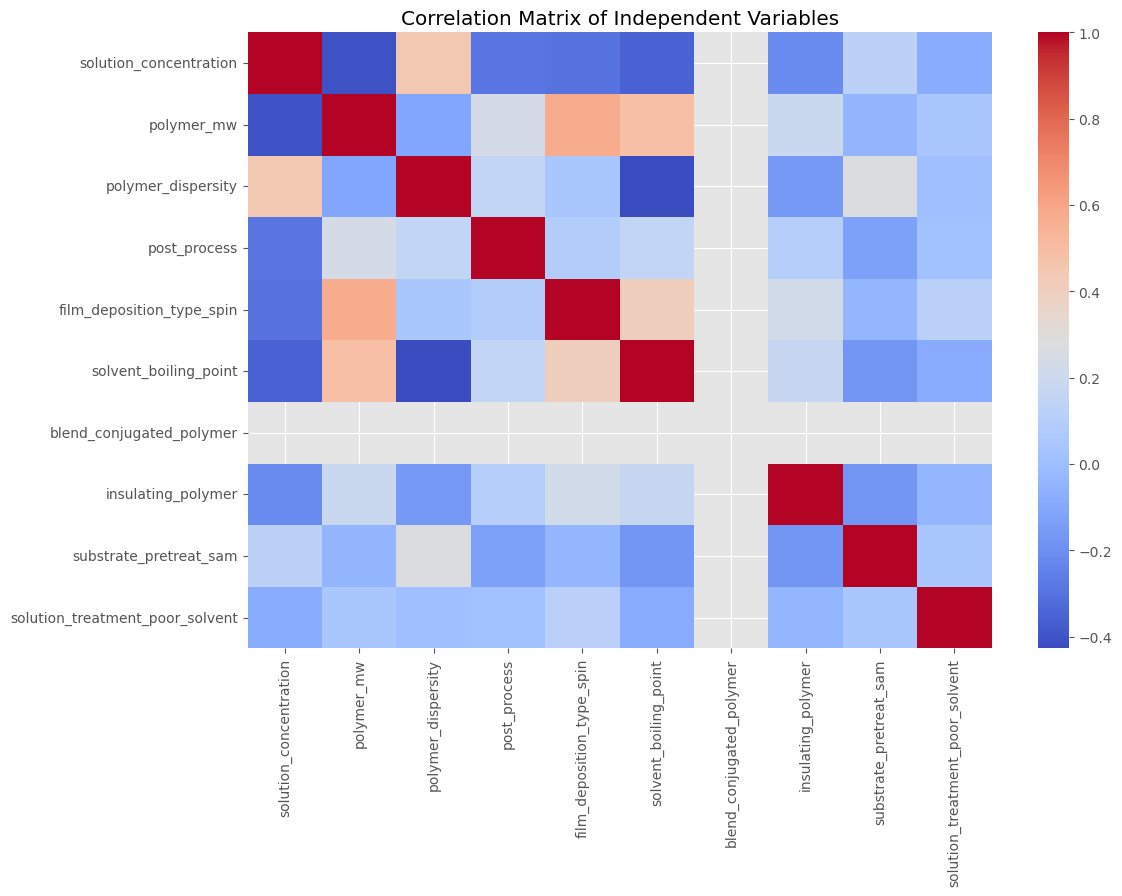

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


IndexError: index 10 is out of bounds for axis 1 with size 10

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
correlation_matrix = DPP_DTT_X.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()
plt.savefig(fname='DPP_DTT_revised_matrix.tif', format='tiff', dpi=300)

vif_data = pd.DataFrame()
vif_data['Feature'] = DPP_DTT_X.columns
vif_data['VIF'] = [
    variance_inflation_factor(DPP_DTT_X, i + 1) for i in range(DPP_DTT_X.shape[1])
]

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.823991     0.682261
1   3      0.786321     0.770927
2   4      0.782456     0.776505
3   5      0.783472     0.748265
4   6      0.781563     0.699709
5   7      0.780796     0.687504
6   8      0.782275     0.712133
7   9      0.778850     0.672377
8  10      0.780045     0.527762


In [1]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [9]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import AdaBoostRegressor

# Define the objective function for Bayesian Optimization
def objective_function(**params):
    # Convert parameters to float (BayesianOptimization passes them as numpy.float64)
    params = {k: float(v) for k, v in params.items()}
    
    # Instantiate AdaBoost Regressor with given parameters
    model = AdaBoostRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate']
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Return the R^2 score as the objective
    return r2_score(y_test, y_pred)

# Define the parameter space for Bayesian Optimization
pbounds = {
    'n_estimators': (10, 200),  # Number of estimators
    'learning_rate': (0.01, 1.0)  # Learning rate
}

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=5,  # Number of initial random points
    n_iter=20  # Number of iterations
)

# Output the best parameters and the corresponding R^2 score
print("Best parameters:", optimizer.max['params'])
print("Best R^2 score:", optimizer.max['target'])

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.691     | 0.3808    | 190.6     |
| 2         | 0.6555    | 0.7347    | 123.7     |
| 3         | 0.6249    | 0.1645    | 39.64     |
| 4         | 0.7005    | 0.0675    | 174.6     |
| 5         | 0.7235    | 0.6051    | 144.5     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

| 6         | 0.7273    | 0.1366    | 150.4     |
| 7         | 0.7805    | 0.9794    | 81.57     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| 8         | 0.7559    | 0.1223    | 93.26     |
| 9         | 0.4295    | 0.0109    | 69.5      |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 10        | 0.5924    | 0.9757    | 86.88     |
| 11        | 0.6296    | 0.04215   | 50.9      |
| 12        | 0.6306    | 0.4474    | 166.6     |
| 13        | 0.6579    | 0.02843   | 93.28     |
| 14        | 0.7557    | 0.4012    | 102.6     |
| 15        | 0.7523    | 0.6933    | 33.26     |
| 16        | 0.5459    | 0.608     | 38.82     |
| 17        | 0.4378    | 0.7948    | 177.9     |


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

| 18        | 0.7672    | 0.7385    | 33.36     |
| 19        | 0.651     | 0.3337    | 93.25     |
| 20        | 0.7566    | 0.9559    | 59.68     |
| 21        | 0.6333    | 0.9612    | 81.57     |
| 22        | 0.6689    | 0.2162    | 157.3     |
| 23        | 0.6307    | 0.821     | 139.3     |
| 24        | 0.6809    | 0.5071    | 137.7     |
| 25        | 0.6894    | 0.6383    | 155.4     |
Best parameters: {'learning_rate': 0.9793596500920299, 'n_estimators': 81.5659964104875}
Best R^2 score: 0.7805020204875375


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 